# setting `ROOT`

In [1]:
import rootutils
import os

root_dir = rootutils.find_root(search_from=".",
                               indicator=".weather_data_root")
print("root_dir:", root_dir)


os.chdir(root_dir)
current_dir = os.getcwd()
print("current dir:", current_dir)

root_dir: C:\Users\rahul_jana\git_workspace\Python101\Miscellaneous\weather_data
current dir: C:\Users\rahul_jana\git_workspace\Python101\Miscellaneous\weather_data


# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from xgboost import XGBClassifier, XGBRegressor

In [3]:
# plt.style.use('ggplot')

# df

In [4]:
df = pd.read_csv("data/weatherHistory.csv")

In [5]:
df

Formatted Date        Summary Precip Type  \
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain   
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain   
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain   
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain   
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain   
...                              ...            ...         ...   
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0             9.472222                  7.388889      0.89            14.1197   
1             9.355556                  7.227778      0.86            14.2646   
2             9.377778                  9.377778      0.89             3.9284   
3             8.288889                  5.944444      0.83            14.1036   
4             8.755556                  6.977778      0.83            11.0446   
...                ...                       ...       ...                ...   
96448        26.016667                 26.016667      0.43            10.9963   
96449        24.583333                 24.583333      0.48            10.0947   
96450        22.038889                 22.038889      0.56             8.9838   
96451        21.522222                 21.522222      0.60            10.5294   
96452        20.438889                 20.438889      0.61             5.8765   

       Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
0                         251          15.8263           0   
1                         259          15.8263           0   
2                         204          14.9569           0   
3                         269          15.8263           0   
4                         259          15.8263           0   
...                       ...              ...         ...   
96448                      31          16.1000           0   
96449                      20          15.5526           0   
96450                      30          16.1000           0   
96451                      20          16.1000           0   
96452                      39          15.5204           0   

       Pressure (millibars)                           Daily Summary  
0                   1015.13       Partly cloudy throughout the day.  
1                   1015.63       Partly cloudy throughout the day.  
2                   1015.94       Partly cloudy throughout the day.  
3                   1016.41       Partly cloudy throughout the day.  
4                   1016.51       Partly cloudy throughout the day.  
...                     ...                                     ...  
96448               1014.36  Partly cloudy starting in the morning.  
96449               1015.16  Partly cloudy starting in the morning.  
96450               1015.66  Partly cloudy starting in the morning.  
96451               1015.95  Partly cloudy starting in the morning.  
96452               1016.16  Partly cloudy starting in the morning.  

[96453 rows x 12 columns]

# EDA

In [6]:
# Check for null values in the dataframe
null_values = df.isnull().sum()
print(null_values)

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


In [7]:
df["Precip Type"].value_counts()

Precip Type
rain    85224
snow    10712
Name: count, dtype: int64

In [8]:
df_not_null = df.drop(["Precip Type"], axis=1)
df_not_null.isnull().sum()

Formatted Date              0
Summary                     0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

## Preprocess

In [11]:
df_not_null['Formatted Date'] = df_not_null['Formatted Date'].str.replace(r'\s\+\d{4}', '', regex=True)
df_not_null.head()

Formatted Date        Summary  Temperature (C)  \
0  2006-04-01 00:00:00.000  Partly Cloudy         9.472222   
1  2006-04-01 01:00:00.000  Partly Cloudy         9.355556   
2  2006-04-01 02:00:00.000  Mostly Cloudy         9.377778   
3  2006-04-01 03:00:00.000  Partly Cloudy         8.288889   
4  2006-04-01 04:00:00.000  Mostly Cloudy         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                     251          15.8263           0               1015.13   
1                     259          15.8263           0               1015.63   
2                     204          14.9569           0               1015.94   
3                     269          15.8263           0               1016.41   
4                     259          15.8263           0               1016.51   

                       Daily Summary  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  
2  Partly cloudy throughout the day.  
3  Partly cloudy throughout the day.  
4  Partly cloudy throughout the day.

In [12]:
df_not_null['Formatted Date'] = df_not_null['Formatted Date'].str.replace(r'\.000', '', regex=True)
df_not_null.head()

Formatted Date        Summary  Temperature (C)  \
0  2006-04-01 00:00:00  Partly Cloudy         9.472222   
1  2006-04-01 01:00:00  Partly Cloudy         9.355556   
2  2006-04-01 02:00:00  Mostly Cloudy         9.377778   
3  2006-04-01 03:00:00  Partly Cloudy         8.288889   
4  2006-04-01 04:00:00  Mostly Cloudy         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                     251          15.8263           0               1015.13   
1                     259          15.8263           0               1015.63   
2                     204          14.9569           0               1015.94   
3                     269          15.8263           0               1016.41   
4                     259          15.8263           0               1016.51   

                       Daily Summary  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  
2  Partly cloudy throughout the day.  
3  Partly cloudy throughout the day.  
4  Partly cloudy throughout the day.

In [13]:
df_not_null['Formatted Date'] = pd.to_datetime(df_not_null['Formatted Date']).dt.strftime('%Y-%m-%d %H:%M:%S')
df_not_null.head()

Formatted Date        Summary  Temperature (C)  \
0  2006-04-01 00:00:00  Partly Cloudy         9.472222   
1  2006-04-01 01:00:00  Partly Cloudy         9.355556   
2  2006-04-01 02:00:00  Mostly Cloudy         9.377778   
3  2006-04-01 03:00:00  Partly Cloudy         8.288889   
4  2006-04-01 04:00:00  Mostly Cloudy         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                     251          15.8263           0               1015.13   
1                     259          15.8263           0               1015.63   
2                     204          14.9569           0               1015.94   
3                     269          15.8263           0               1016.41   
4                     259          15.8263           0               1016.51   

                       Daily Summary  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  
2  Partly cloudy throughout the day.  
3  Partly cloudy throughout the day.  
4  Partly cloudy throughout the day.

In [14]:
df_not_null.index = df_not_null['Formatted Date']

In [15]:
df_not_null

Formatted Date        Summary  Temperature (C)  \
Formatted Date                                                             
2006-04-01 00:00:00  2006-04-01 00:00:00  Partly Cloudy         9.472222   
2006-04-01 01:00:00  2006-04-01 01:00:00  Partly Cloudy         9.355556   
2006-04-01 02:00:00  2006-04-01 02:00:00  Mostly Cloudy         9.377778   
2006-04-01 03:00:00  2006-04-01 03:00:00  Partly Cloudy         8.288889   
2006-04-01 04:00:00  2006-04-01 04:00:00  Mostly Cloudy         8.755556   
...                                  ...            ...              ...   
2016-09-09 19:00:00  2016-09-09 19:00:00  Partly Cloudy        26.016667   
2016-09-09 20:00:00  2016-09-09 20:00:00  Partly Cloudy        24.583333   
2016-09-09 21:00:00  2016-09-09 21:00:00  Partly Cloudy        22.038889   
2016-09-09 22:00:00  2016-09-09 22:00:00  Partly Cloudy        21.522222   
2016-09-09 23:00:00  2016-09-09 23:00:00  Partly Cloudy        20.438889   

                     Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
Formatted Date                                                               
2006-04-01 00:00:00                  7.388889      0.89            14.1197   
2006-04-01 01:00:00                  7.227778      0.86            14.2646   
2006-04-01 02:00:00                  9.377778      0.89             3.9284   
2006-04-01 03:00:00                  5.944444      0.83            14.1036   
2006-04-01 04:00:00                  6.977778      0.83            11.0446   
...                                       ...       ...                ...   
2016-09-09 19:00:00                 26.016667      0.43            10.9963   
2016-09-09 20:00:00                 24.583333      0.48            10.0947   
2016-09-09 21:00:00                 22.038889      0.56             8.9838   
2016-09-09 22:00:00                 21.522222      0.60            10.5294   
2016-09-09 23:00:00                 20.438889      0.61             5.8765   

                     Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
Formatted Date                                                             
2006-04-01 00:00:00                     251          15.8263           0   
2006-04-01 01:00:00                     259          15.8263           0   
2006-04-01 02:00:00                     204          14.9569           0   
2006-04-01 03:00:00                     269          15.8263           0   
2006-04-01 04:00:00                     259          15.8263           0   
...                                     ...              ...         ...   
2016-09-09 19:00:00                      31          16.1000           0   
2016-09-09 20:00:00                      20          15.5526           0   
2016-09-09 21:00:00                      30          16.1000           0   
2016-09-09 22:00:00                      20          16.1000           0   
2016-09-09 23:00:00                      39          15.5204           0   

                     Pressure (millibars)  \
Formatted Date                              
2006-04-01 00:00:00               1015.13   
2006-04-01 01:00:00               1015.63   
2006-04-01 02:00:00               1015.94   
2006-04-01 03:00:00               1016.41   
2006-04-01 04:00:00               1016.51   
...                                   ...   
2016-09-09 19:00:00               1014.36   
2016-09-09 20:00:00               1015.16   
2016-09-09 21:00:00               1015.66   
2016-09-09 22:00:00               1015.95   
2016-09-09 23:00:00               1016.16   

                                              Daily Summary  
Formatted Date                                               
2006-04-01 00:00:00       Partly cloudy throughout the day.  
2006-04-01 01:00:00       Partly cloudy throughout the day.  
2006-04-01 02:00:00       Partly cloudy throughout the day.  
2006-04-01 03:00:00       Partly cloudy throughout the day.  
2006-04-01 04:00:00       Partly cloudy throughout the day.  
...          

In [25]:
df_not_null['Formatted Date'].info()

<class 'pandas.core.series.Series'>
Index: 96453 entries, 2006-04-01 00:00:00 to 2016-09-09 23:00:00
Series name: Formatted Date
Non-Null Count  Dtype 
--------------  ----- 
96453 non-null  object
dtypes: object(1)
memory usage: 3.5+ MB


In [34]:
save_dir = os.path.join(current_dir, 'save_figs')
os.makedirs(save_dir, exist_ok=True)

## Plots

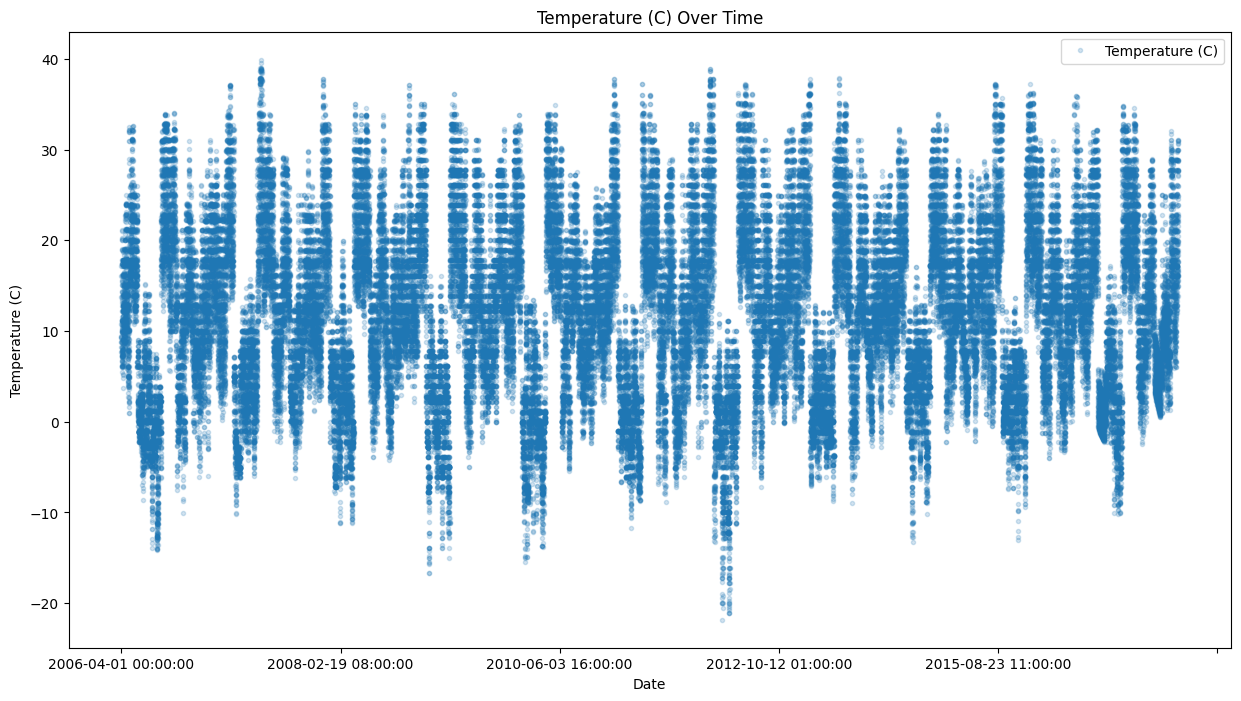

In [35]:
temp_df = df_not_null[['Temperature (C)']]
ax = temp_df.plot(style=".",
                  figsize=(15, 8),
                  alpha=0.2,
                  xlabel='Date',
                  ylabel='Temperature (C)')
ax.set_title('Temperature (C) Over Time')

# Save the figure
fig = ax.get_figure()
fig.savefig(os.path.join(save_dir, 'Temperature_Over_Time.png'))

In [36]:
def plot_feature_over_time(df, save_dir):
    for feature in df.columns:
        feature_df = df[[feature]]
        ax = feature_df.plot(style=".",
                             figsize=(15, 8),
                             alpha=0.2,
                             xlabel='Date',
                             ylabel=feature)
        ax.set_title(f'{feature} Over Time')

        # Save the figure
        fig = ax.get_figure()
        fig.savefig(os.path.join(save_dir, f'{feature}_Over_Time.png'))

In [38]:
df_not_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96453 entries, 2006-04-01 00:00:00 to 2016-09-09 23:00:00
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Temperature (C)           96453 non-null  float64
 3   Apparent Temperature (C)  96453 non-null  float64
 4   Humidity                  96453 non-null  float64
 5   Wind Speed (km/h)         96453 non-null  float64
 6   Wind Bearing (degrees)    96453 non-null  int64  
 7   Visibility (km)           96453 non-null  float64
 8   Loud Cover                96453 non-null  int64  
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 10.8+ MB


In [39]:
# Select columns with float or int values
numeric_df = df_not_null.select_dtypes(include=['float64', 'int64'])
numeric_df.head()

Temperature (C)  Apparent Temperature (C)  Humidity  \
Formatted Date                                                             
2006-04-01 00:00:00         9.472222                  7.388889      0.89   
2006-04-01 01:00:00         9.355556                  7.227778      0.86   
2006-04-01 02:00:00         9.377778                  9.377778      0.89   
2006-04-01 03:00:00         8.288889                  5.944444      0.83   
2006-04-01 04:00:00         8.755556                  6.977778      0.83   

                     Wind Speed (km/h)  Wind Bearing (degrees)  \
Formatted Date                                                   
2006-04-01 00:00:00            14.1197                     251   
2006-04-01 01:00:00            14.2646                     259   
2006-04-01 02:00:00             3.9284                     204   
2006-04-01 03:00:00            14.1036                     269   
2006-04-01 04:00:00            11.0446                     259   

                     Visibility (km)  Loud Cover  Pressure (millibars)  
Formatted Date                                                          
2006-04-01 00:00:00          15.8263           0               1015.13  
2006-04-01 01:00:00          15.8263           0               1015.63  
2006-04-01 02:00:00          14.9569           0               1015.94  
2006-04-01 03:00:00          15.8263           0               1016.41  
2006-04-01 04:00:00          15.8263           0               1016.51

In [41]:
numeric_df.rename(columns={'Wind Speed (km/h)': 'Wind Speed (kmph)'}, inplace=True)
numeric_df

Temperature (C)  Apparent Temperature (C)  Humidity  \
Formatted Date                                                             
2006-04-01 00:00:00         9.472222                  7.388889      0.89   
2006-04-01 01:00:00         9.355556                  7.227778      0.86   
2006-04-01 02:00:00         9.377778                  9.377778      0.89   
2006-04-01 03:00:00         8.288889                  5.944444      0.83   
2006-04-01 04:00:00         8.755556                  6.977778      0.83   
...                              ...                       ...       ...   
2016-09-09 19:00:00        26.016667                 26.016667      0.43   
2016-09-09 20:00:00        24.583333                 24.583333      0.48   
2016-09-09 21:00:00        22.038889                 22.038889      0.56   
2016-09-09 22:00:00        21.522222                 21.522222      0.60   
2016-09-09 23:00:00        20.438889                 20.438889      0.61   

                     Wind Speed (kmph)  Wind Bearing (degrees)  \
Formatted Date                                                   
2006-04-01 00:00:00            14.1197                     251   
2006-04-01 01:00:00            14.2646                     259   
2006-04-01 02:00:00             3.9284                     204   
2006-04-01 03:00:00            14.1036                     269   
2006-04-01 04:00:00            11.0446                     259   
...                                ...                     ...   
2016-09-09 19:00:00            10.9963                      31   
2016-09-09 20:00:00            10.0947                      20   
2016-09-09 21:00:00             8.9838                      30   
2016-09-09 22:00:00            10.5294                      20   
2016-09-09 23:00:00             5.8765                      39   

                     Visibility (km)  Loud Cover  Pressure (millibars)  
Formatted Date                                                          
2006-04-01 00:00:00          15.8263           0               1015.13  
2006-04-01 01:00:00          15.8263           0               1015.63  
2006-04-01 02:00:00          14.9569           0               1015.94  
2006-04-01 03:00:00          15.8263           0               1016.41  
2006-04-01 04:00:00          15.8263           0               1016.51  
...                              ...         ...                   ...  
2016-09-09 19:00:00          16.1000           0               1014.36  
2016-09-09 20:00:00          15.5526           0               1015.16  
2016-09-09 21:00:00          16.1000           0               1015.66  
2016-09-09 22:00:00          16.1000           0               1015.95  
2016-09-09 23:00:00          15.5204           0               1016.16  

[96453 rows x 8 columns]

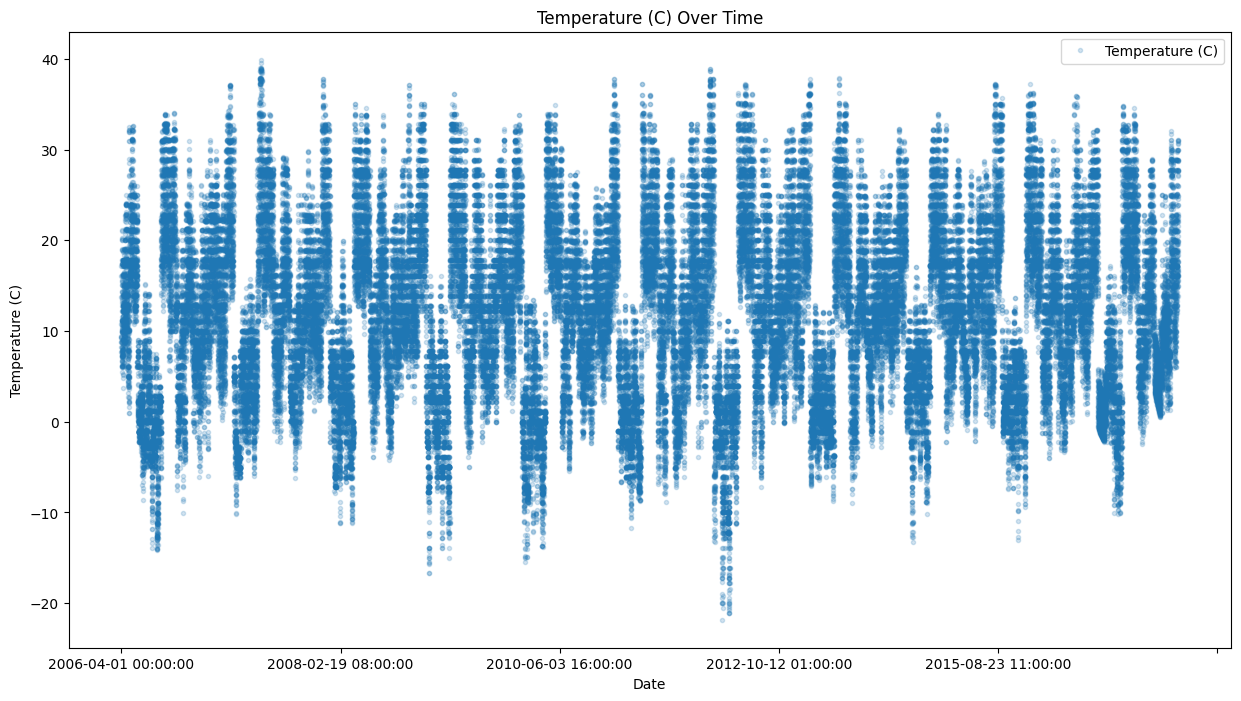

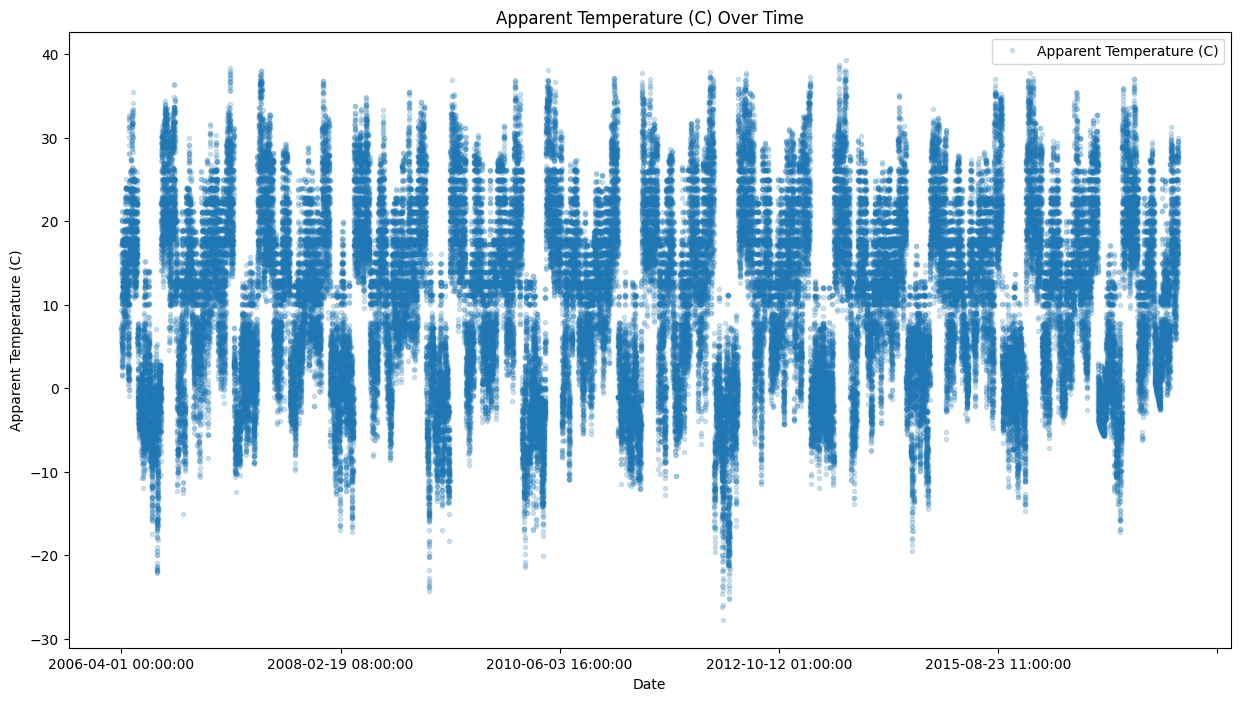

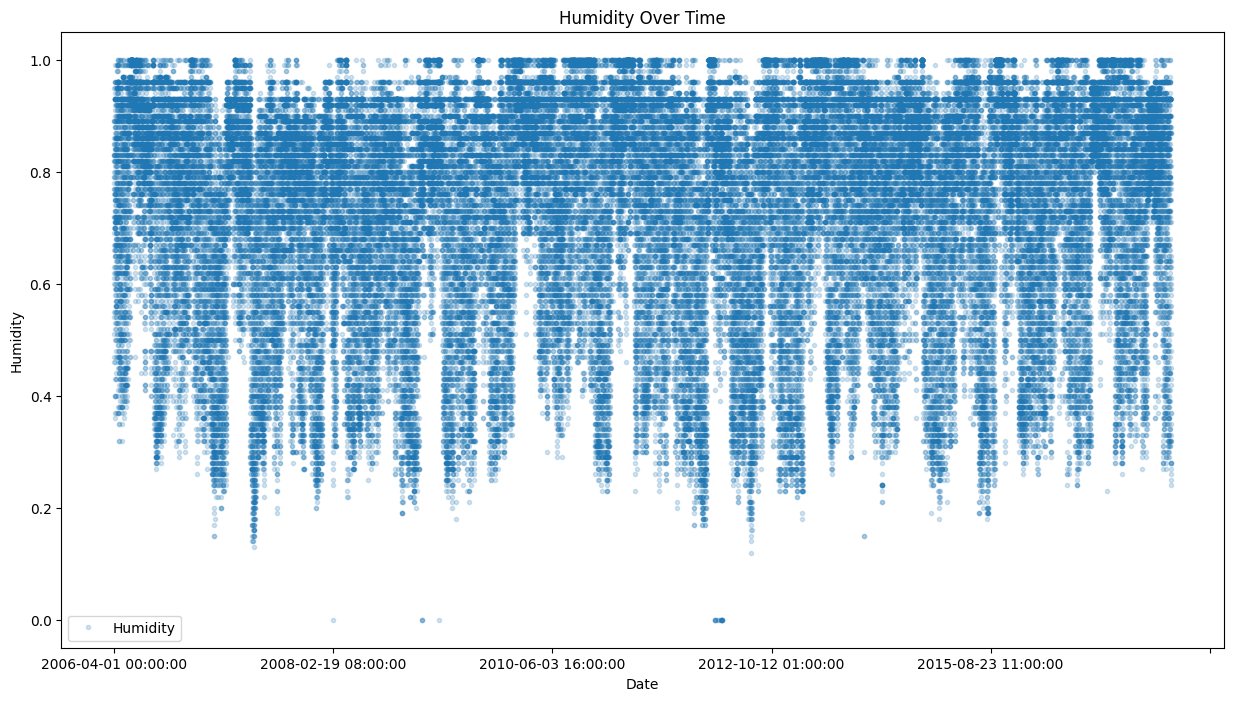

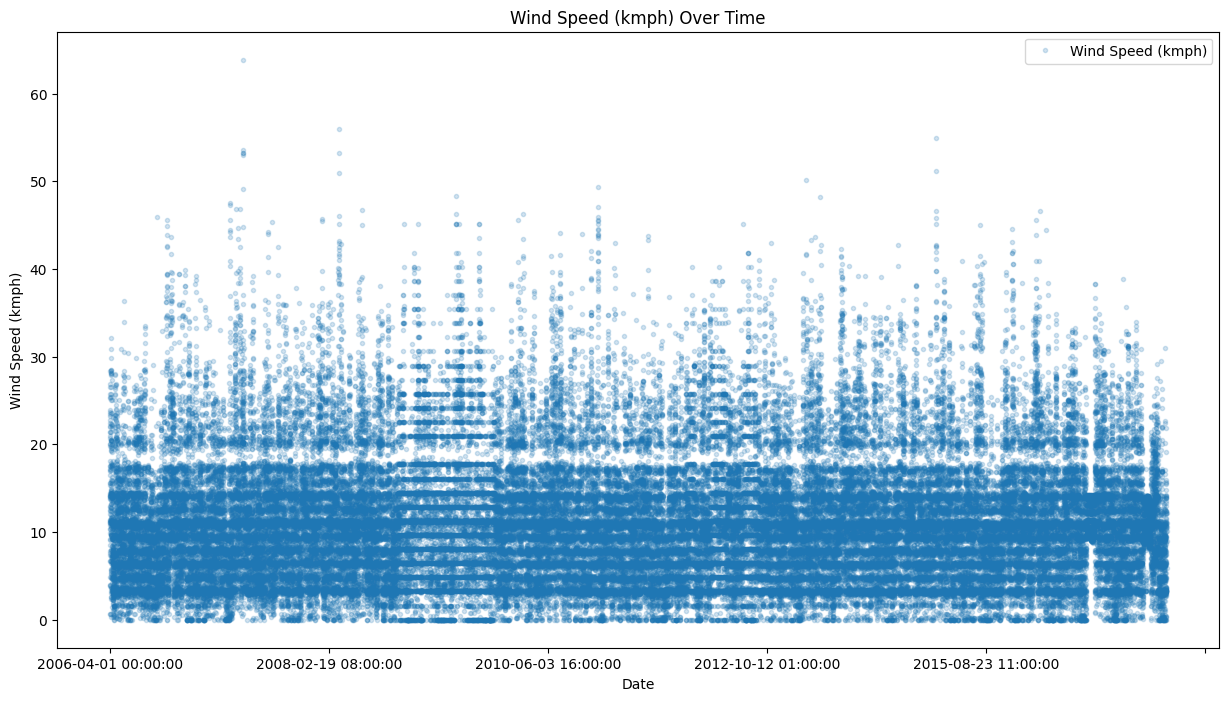

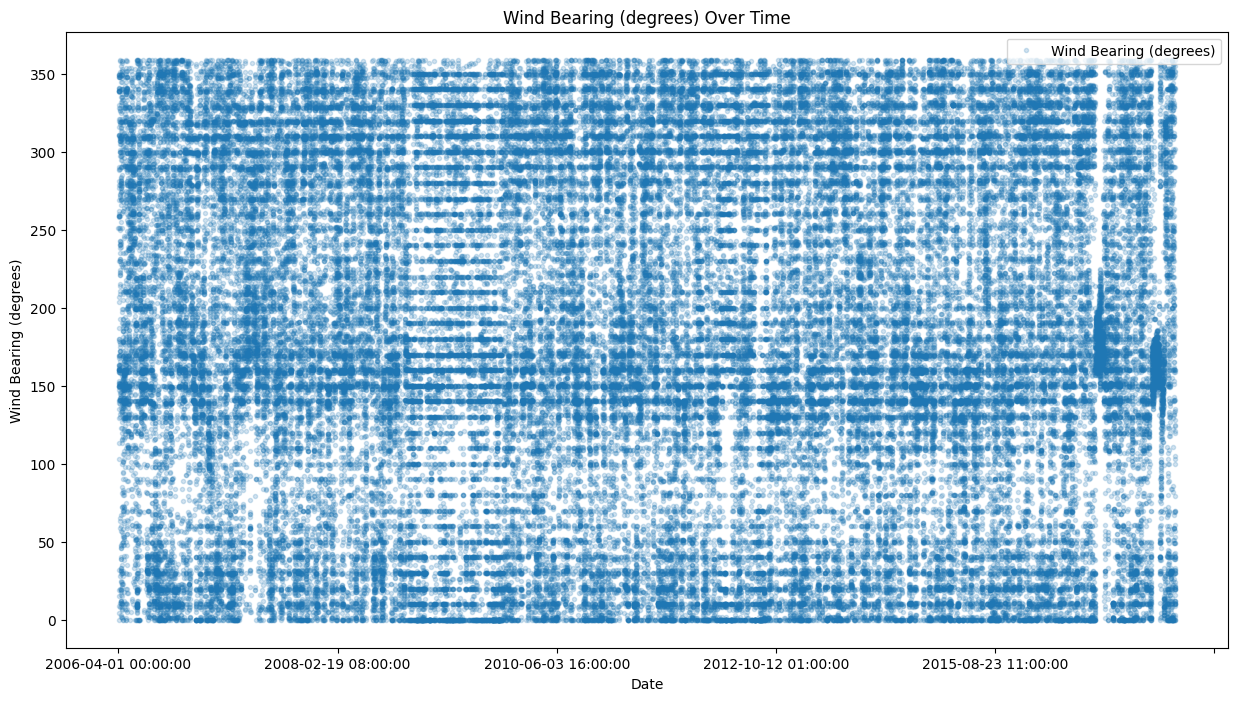

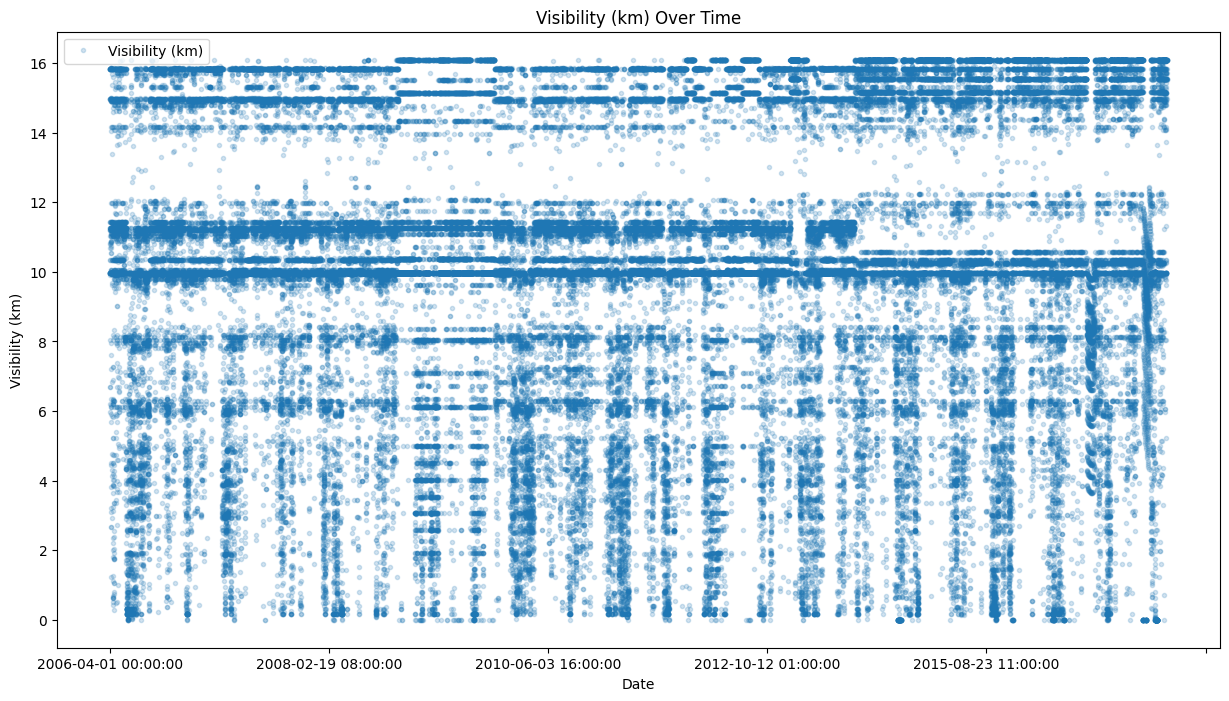

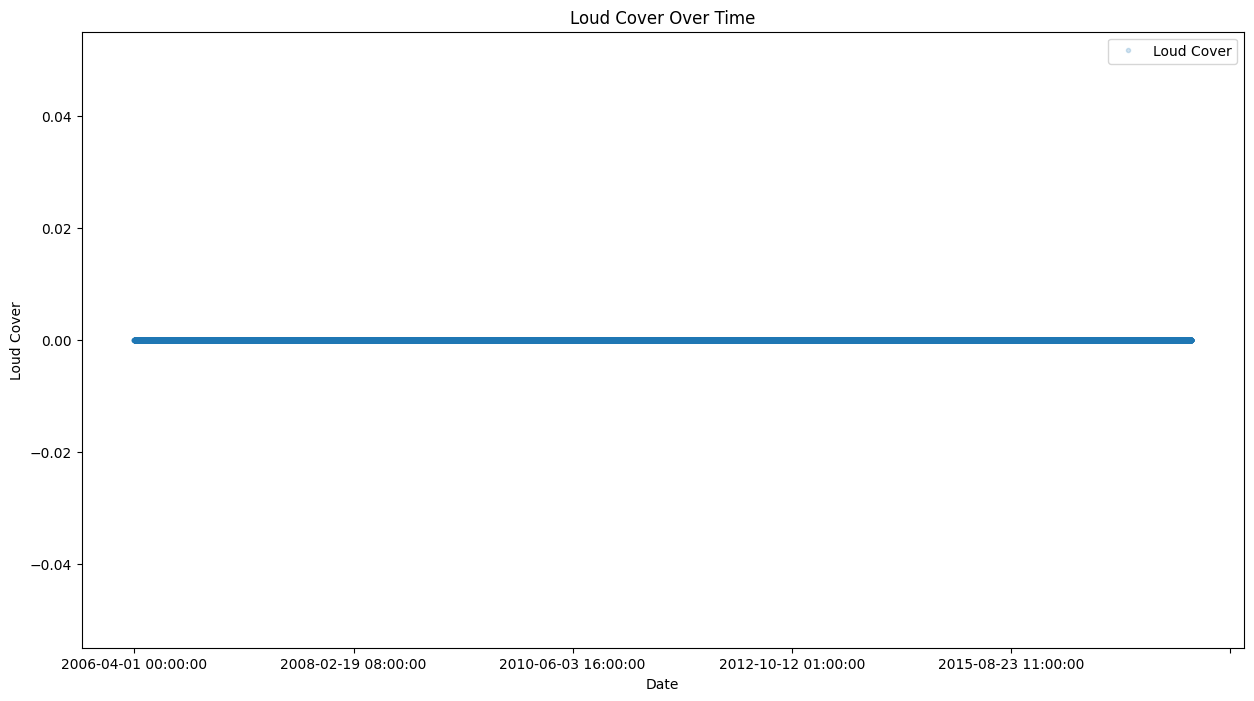

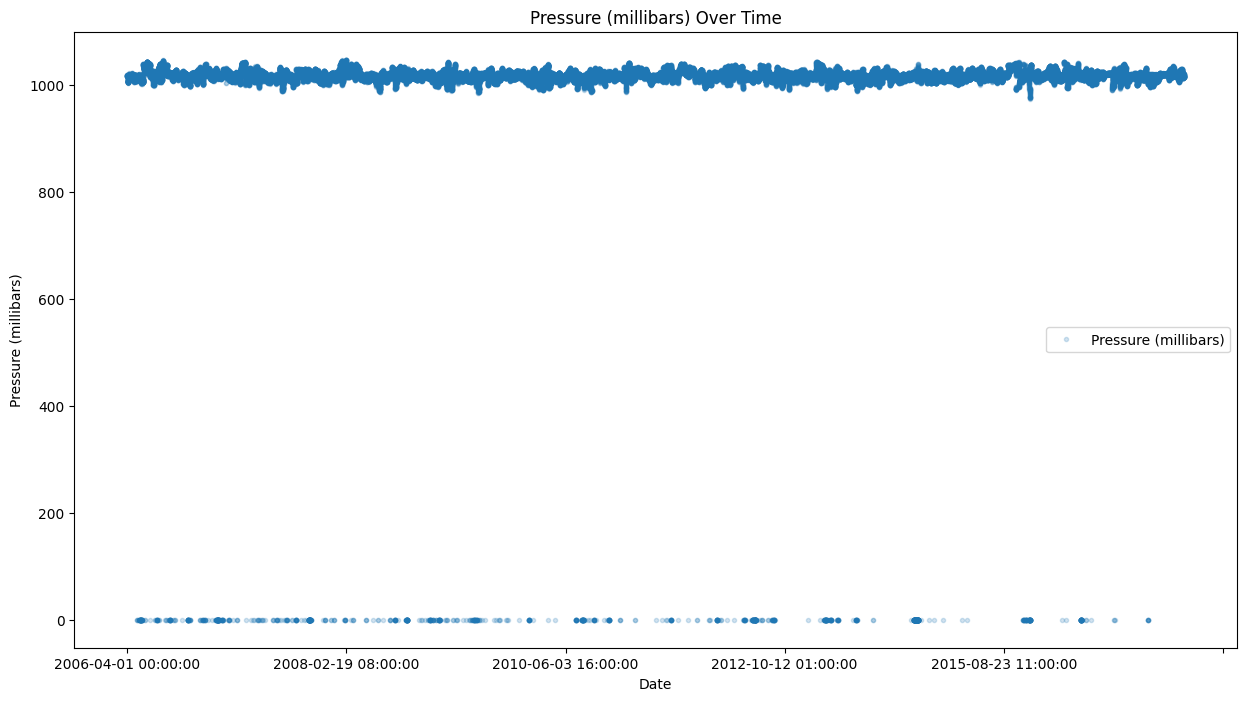

In [42]:
plot_feature_over_time(numeric_df, save_dir)

In [43]:
numeric_df

Temperature (C)  Apparent Temperature (C)  Humidity  \
Formatted Date                                                             
2006-04-01 00:00:00         9.472222                  7.388889      0.89   
2006-04-01 01:00:00         9.355556                  7.227778      0.86   
2006-04-01 02:00:00         9.377778                  9.377778      0.89   
2006-04-01 03:00:00         8.288889                  5.944444      0.83   
2006-04-01 04:00:00         8.755556                  6.977778      0.83   
...                              ...                       ...       ...   
2016-09-09 19:00:00        26.016667                 26.016667      0.43   
2016-09-09 20:00:00        24.583333                 24.583333      0.48   
2016-09-09 21:00:00        22.038889                 22.038889      0.56   
2016-09-09 22:00:00        21.522222                 21.522222      0.60   
2016-09-09 23:00:00        20.438889                 20.438889      0.61   

                     Wind Speed (kmph)  Wind Bearing (degrees)  \
Formatted Date                                                   
2006-04-01 00:00:00            14.1197                     251   
2006-04-01 01:00:00            14.2646                     259   
2006-04-01 02:00:00             3.9284                     204   
2006-04-01 03:00:00            14.1036                     269   
2006-04-01 04:00:00            11.0446                     259   
...                                ...                     ...   
2016-09-09 19:00:00            10.9963                      31   
2016-09-09 20:00:00            10.0947                      20   
2016-09-09 21:00:00             8.9838                      30   
2016-09-09 22:00:00            10.5294                      20   
2016-09-09 23:00:00             5.8765                      39   

                     Visibility (km)  Loud Cover  Pressure (millibars)  
Formatted Date                                                          
2006-04-01 00:00:00          15.8263           0               1015.13  
2006-04-01 01:00:00          15.8263           0               1015.63  
2006-04-01 02:00:00          14.9569           0               1015.94  
2006-04-01 03:00:00          15.8263           0               1016.41  
2006-04-01 04:00:00          15.8263           0               1016.51  
...                              ...         ...                   ...  
2016-09-09 19:00:00          16.1000           0               1014.36  
2016-09-09 20:00:00          15.5526           0               1015.16  
2016-09-09 21:00:00          16.1000           0               1015.66  
2016-09-09 22:00:00          16.1000           0               1015.95  
2016-09-09 23:00:00          15.5204           0               1016.16  

[96453 rows x 8 columns]

## Time data extraction

In [64]:
def create_time_features(df:pd.DataFrame):
    df = df.copy()
    df["day"] = df.index.day
    df["month"] = df.index.month
    df["year"] = df.index.year
    df["dayOfYear"] = df.index.dayofyear
    return df

In [66]:
df_not_null

Formatted Date        Summary  Temperature (C)  \
Formatted Date                                                             
2006-04-01 00:00:00  2006-04-01 00:00:00  Partly Cloudy         9.472222   
2006-04-01 01:00:00  2006-04-01 01:00:00  Partly Cloudy         9.355556   
2006-04-01 02:00:00  2006-04-01 02:00:00  Mostly Cloudy         9.377778   
2006-04-01 03:00:00  2006-04-01 03:00:00  Partly Cloudy         8.288889   
2006-04-01 04:00:00  2006-04-01 04:00:00  Mostly Cloudy         8.755556   
...                                  ...            ...              ...   
2016-09-09 19:00:00  2016-09-09 19:00:00  Partly Cloudy        26.016667   
2016-09-09 20:00:00  2016-09-09 20:00:00  Partly Cloudy        24.583333   
2016-09-09 21:00:00  2016-09-09 21:00:00  Partly Cloudy        22.038889   
2016-09-09 22:00:00  2016-09-09 22:00:00  Partly Cloudy        21.522222   
2016-09-09 23:00:00  2016-09-09 23:00:00  Partly Cloudy        20.438889   

                     Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
Formatted Date                                                               
2006-04-01 00:00:00                  7.388889      0.89            14.1197   
2006-04-01 01:00:00                  7.227778      0.86            14.2646   
2006-04-01 02:00:00                  9.377778      0.89             3.9284   
2006-04-01 03:00:00                  5.944444      0.83            14.1036   
2006-04-01 04:00:00                  6.977778      0.83            11.0446   
...                                       ...       ...                ...   
2016-09-09 19:00:00                 26.016667      0.43            10.9963   
2016-09-09 20:00:00                 24.583333      0.48            10.0947   
2016-09-09 21:00:00                 22.038889      0.56             8.9838   
2016-09-09 22:00:00                 21.522222      0.60            10.5294   
2016-09-09 23:00:00                 20.438889      0.61             5.8765   

                     Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
Formatted Date                                                             
2006-04-01 00:00:00                     251          15.8263           0   
2006-04-01 01:00:00                     259          15.8263           0   
2006-04-01 02:00:00                     204          14.9569           0   
2006-04-01 03:00:00                     269          15.8263           0   
2006-04-01 04:00:00                     259          15.8263           0   
...                                     ...              ...         ...   
2016-09-09 19:00:00                      31          16.1000           0   
2016-09-09 20:00:00                      20          15.5526           0   
2016-09-09 21:00:00                      30          16.1000           0   
2016-09-09 22:00:00                      20          16.1000           0   
2016-09-09 23:00:00                      39          15.5204           0   

                     Pressure (millibars)  \
Formatted Date                              
2006-04-01 00:00:00               1015.13   
2006-04-01 01:00:00               1015.63   
2006-04-01 02:00:00               1015.94   
2006-04-01 03:00:00               1016.41   
2006-04-01 04:00:00               1016.51   
...                                   ...   
2016-09-09 19:00:00               1014.36   
2016-09-09 20:00:00               1015.16   
2016-09-09 21:00:00               1015.66   
2016-09-09 22:00:00               1015.95   
2016-09-09 23:00:00               1016.16   

                                              Daily Summary  
Formatted Date                                               
2006-04-01 00:00:00       Partly cloudy throughout the day.  
2006-04-01 01:00:00       Partly cloudy throughout the day.  
2006-04-01 02:00:00       Partly cloudy throughout the day.  
2006-04-01 03:00:00       Partly cloudy throughout the day.  
2006-04-01 04:00:00       Partly cloudy throughout the day.  
...          

In [67]:
def create_time_features(df: pd.DataFrame):
    df = df.copy()
    df.index = pd.to_datetime(df.index)  # Ensure the index is a DatetimeIndex
    df["day"] = df.index.day
    df["month"] = df.index.month
    df["year"] = df.index.year
    df["dayOfYear"] = df.index.dayofyear
    return df

In [ ]:
df_td = create_time_features(df_not_null)

In [69]:
df_td

Formatted Date        Summary  Temperature (C)  \
Formatted Date                                                             
2006-04-01 00:00:00  2006-04-01 00:00:00  Partly Cloudy         9.472222   
2006-04-01 01:00:00  2006-04-01 01:00:00  Partly Cloudy         9.355556   
2006-04-01 02:00:00  2006-04-01 02:00:00  Mostly Cloudy         9.377778   
2006-04-01 03:00:00  2006-04-01 03:00:00  Partly Cloudy         8.288889   
2006-04-01 04:00:00  2006-04-01 04:00:00  Mostly Cloudy         8.755556   
...                                  ...            ...              ...   
2016-09-09 19:00:00  2016-09-09 19:00:00  Partly Cloudy        26.016667   
2016-09-09 20:00:00  2016-09-09 20:00:00  Partly Cloudy        24.583333   
2016-09-09 21:00:00  2016-09-09 21:00:00  Partly Cloudy        22.038889   
2016-09-09 22:00:00  2016-09-09 22:00:00  Partly Cloudy        21.522222   
2016-09-09 23:00:00  2016-09-09 23:00:00  Partly Cloudy        20.438889   

                     Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
Formatted Date                                                               
2006-04-01 00:00:00                  7.388889      0.89            14.1197   
2006-04-01 01:00:00                  7.227778      0.86            14.2646   
2006-04-01 02:00:00                  9.377778      0.89             3.9284   
2006-04-01 03:00:00                  5.944444      0.83            14.1036   
2006-04-01 04:00:00                  6.977778      0.83            11.0446   
...                                       ...       ...                ...   
2016-09-09 19:00:00                 26.016667      0.43            10.9963   
2016-09-09 20:00:00                 24.583333      0.48            10.0947   
2016-09-09 21:00:00                 22.038889      0.56             8.9838   
2016-09-09 22:00:00                 21.522222      0.60            10.5294   
2016-09-09 23:00:00                 20.438889      0.61             5.8765   

                     Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
Formatted Date                                                             
2006-04-01 00:00:00                     251          15.8263           0   
2006-04-01 01:00:00                     259          15.8263           0   
2006-04-01 02:00:00                     204          14.9569           0   
2006-04-01 03:00:00                     269          15.8263           0   
2006-04-01 04:00:00                     259          15.8263           0   
...                                     ...              ...         ...   
2016-09-09 19:00:00                      31          16.1000           0   
2016-09-09 20:00:00                      20          15.5526           0   
2016-09-09 21:00:00                      30          16.1000           0   
2016-09-09 22:00:00                      20          16.1000           0   
2016-09-09 23:00:00                      39          15.5204           0   

                     Pressure (millibars)  \
Formatted Date                              
2006-04-01 00:00:00               1015.13   
2006-04-01 01:00:00               1015.63   
2006-04-01 02:00:00               1015.94   
2006-04-01 03:00:00               1016.41   
2006-04-01 04:00:00               1016.51   
...                                   ...   
2016-09-09 19:00:00               1014.36   
2016-09-09 20:00:00               1015.16   
2016-09-09 21:00:00               1015.66   
2016-09-09 22:00:00               1015.95   
2016-09-09 23:00:00               1016.16   

                                              Daily Summary  day  month  year  \
Formatted Date                                                                  
2006-04-01 00:00:00       Partly cloudy throughout the day.    1      4  2006   
2006-04-01 01:00:00       Partly cloudy throughout the day.    1      4  2006   
2006-04-01 02:00:00       Partly cloudy throughout the day.    1      4  2006   
2006-04-01 03:00:00       Partly cloudy th

# TODO: check dataset integrty, if there are blanks in the data

# `train-test-split`

In [70]:
# Calculate the split index
split_index = int(len(df_td) * 0.8)

# Split the data
train_df = df_td[:split_index]
test_df = df_td[split_index:]

print("Training data shape:", train_df.shape)
print("Testing data shape:", test_df.shape)

Training data shape: (77162, 15)
Testing data shape: (19291, 15)


In [71]:
print("First row of train_df:")
print(train_df.head(1).index)

print("\nLast row of train_df:")
print(train_df.tail(1).index)

print("\nFirst row of test_df:")
print(test_df.head(1).index)

print("\nLast row of test_df:")
print(test_df.tail(1).index)

First row of train_df:
DatetimeIndex(['2006-04-01'], dtype='datetime64[ns]', name='Formatted Date', freq=None)

Last row of train_df:
DatetimeIndex(['2014-11-26 05:00:00'], dtype='datetime64[ns]', name='Formatted Date', freq=None)

First row of test_df:
DatetimeIndex(['2014-11-26 06:00:00'], dtype='datetime64[ns]', name='Formatted Date', freq=None)

Last row of test_df:
DatetimeIndex(['2016-09-09 23:00:00'], dtype='datetime64[ns]', name='Formatted Date', freq=None)


In [72]:
train_df.columns

Index(['Formatted Date', 'Summary', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary', 'day', 'month', 'year',
       'dayOfYear'],
      dtype='object')

# Model Training

## Temprature

### Only temp

In [73]:
train_temperture = train_df[['Temperature (C)', 'day', 'month', 'year', 'dayOfYear']]

In [74]:
train_temperture

Temperature (C)  day  month  year  dayOfYear
Formatted Date                                                   
2006-04-01 00:00:00         9.472222    1      4  2006         91
2006-04-01 01:00:00         9.355556    1      4  2006         91
2006-04-01 02:00:00         9.377778    1      4  2006         91
2006-04-01 03:00:00         8.288889    1      4  2006         91
2006-04-01 04:00:00         8.755556    1      4  2006         91
...                              ...  ...    ...   ...        ...
2014-11-26 01:00:00         1.738889   26     11  2014        330
2014-11-26 02:00:00         1.622222   26     11  2014        330
2014-11-26 03:00:00         1.161111   26     11  2014        330
2014-11-26 04:00:00        -0.111111   26     11  2014        330
2014-11-26 05:00:00        -0.944444   26     11  2014        330

[77162 rows x 5 columns]

In [75]:
test_temperture = test_df[['Temperature (C)', 'day', 'month', 'year', 'dayOfYear']]

In [76]:
test_temperture

Temperature (C)  day  month  year  dayOfYear
Formatted Date                                                   
2014-11-26 06:00:00         0.072222   26     11  2014        330
2014-11-26 07:00:00         0.355556   26     11  2014        330
2014-11-26 08:00:00         1.138889   26     11  2014        330
2014-11-26 09:00:00         2.222222   26     11  2014        330
2014-11-26 10:00:00         2.916667   26     11  2014        330
...                              ...  ...    ...   ...        ...
2016-09-09 19:00:00        26.016667    9      9  2016        253
2016-09-09 20:00:00        24.583333    9      9  2016        253
2016-09-09 21:00:00        22.038889    9      9  2016        253
2016-09-09 22:00:00        21.522222    9      9  2016        253
2016-09-09 23:00:00        20.438889    9      9  2016        253

[19291 rows x 5 columns]

In [77]:
def create_lag_features(df, column, lags):
    for lag in range(1, lags + 1):
        df[f'{column}_lag_{lag}'] = df[column].shift(lag)
    return df

In [78]:
train_temperature_lagged = create_lag_features(train_temperture.copy(), 'Temperature (C)', 5)


In [80]:
train_temperature_lagged.dropna(inplace=True)

In [81]:
train_temperature_lagged.head(10)

Temperature (C)  day  month  year  dayOfYear  \
Formatted Date                                                      
2006-04-01 05:00:00         9.222222    1      4  2006         91   
2006-04-01 06:00:00         7.733333    1      4  2006         91   
2006-04-01 07:00:00         8.772222    1      4  2006         91   
2006-04-01 08:00:00        10.822222    1      4  2006         91   
2006-04-01 09:00:00        13.772222    1      4  2006         91   
2006-04-01 10:00:00        16.016667    1      4  2006         91   
2006-04-01 11:00:00        17.144444    1      4  2006         91   
2006-04-01 12:00:00        17.800000    1      4  2006         91   
2006-04-01 13:00:00        17.333333    1      4  2006         91   
2006-04-01 14:00:00        18.877778    1      4  2006         91   

                     Temperature (C)_lag_1  Temperature (C)_lag_2  \
Formatted Date                                                      
2006-04-01 05:00:00               8.755556               8.288889   
2006-04-01 06:00:00               9.222222               8.755556   
2006-04-01 07:00:00               7.733333               9.222222   
2006-04-01 08:00:00               8.772222               7.733333   
2006-04-01 09:00:00              10.822222               8.772222   
2006-04-01 10:00:00              13.772222              10.822222   
2006-04-01 11:00:00              16.016667              13.772222   
2006-04-01 12:00:00              17.144444              16.016667   
2006-04-01 13:00:00              17.800000              17.144444   
2006-04-01 14:00:00              17.333333              17.800000   

                     Temperature (C)_lag_3  Temperature (C)_lag_4  \
Formatted Date                                                      
2006-04-01 05:00:00               9.377778               9.355556   
2006-04-01 06:00:00               8.288889               9.377778   
2006-04-01 07:00:00               8.755556               8.288889   
2006-04-01 08:00:00               9.222222               8.755556   
2006-04-01 09:00:00               7.733333               9.222222   
2006-04-01 10:00:00               8.772222               7.733333   
2006-04-01 11:00:00              10.822222               8.772222   
2006-04-01 12:00:00              13.772222              10.822222   
2006-04-01 13:00:00              16.016667              13.772222   
2006-04-01 14:00:00              17.144444              16.016667   

                     Temperature (C)_lag_5  
Formatted Date                              
2006-04-01 05:00:00               9.472222  
2006-04-01 06:00:00               9.355556  
2006-04-01 07:00:00               9.377778  
2006-04-01 08:00:00               8.288889  
2006-04-01 09:00:00               8.755556  
2006-04-01 10:00:00               9.222222  
2006-04-01 11:00:00               7.733333  
2006-04-01 12:00:00               8.772222  
2006-04-01 13:00:00              10.822222  
2006-04-01 14:00:00              13.772222

In [82]:
X_train = train_temperature_lagged.drop('Temperature (C)', axis=1)
y_train = train_temperature_lagged['Temperature (C)']

In [84]:
test_temperature_lagged = create_lag_features(test_temperture.copy(),
                                               'Temperature (C)',
                                               5)

In [85]:
X_test = test_temperature_lagged.drop('Temperature (C)', axis=1)
y_test = test_temperature_lagged['Temperature (C)']

In [83]:
xgb_regressor = XGBRegressor(n_estimators=200, 
                             early_stopping_rounds=20,
                             learning_rate = 0.01)

In [86]:
xgb_regressor.fit(X_train, 
                  y_train,
                  eval_set = [(X_train, y_train), (X_test, y_test)],
                  verbose=50)

[0]	validation_0-rmse:14.76604	validation_1-rmse:14.68769
[50]	validation_0-rmse:9.01436	validation_1-rmse:8.95460
[100]	validation_0-rmse:5.57405	validation_1-rmse:5.51843
[150]	validation_0-rmse:3.55183	validation_1-rmse:3.48262
[199]	validation_0-rmse:2.42510	validation_1-rmse:2.32948


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=20,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [87]:
feature_importance = pd.DataFrame(data=xgb_regressor.feature_importances_,
                                  index=xgb_regressor.feature_names_in_,
                                  columns=["Importance"])

In [88]:
feature_importance

Importance
day                      0.002443
month                    0.006628
year                     0.000855
dayOfYear                0.003720
Temperature (C)_lag_1    0.962646
Temperature (C)_lag_2    0.002310
Temperature (C)_lag_3    0.004667
Temperature (C)_lag_4    0.007739
Temperature (C)_lag_5    0.008990

<Axes: title={'center': 'Feature Importance'}>

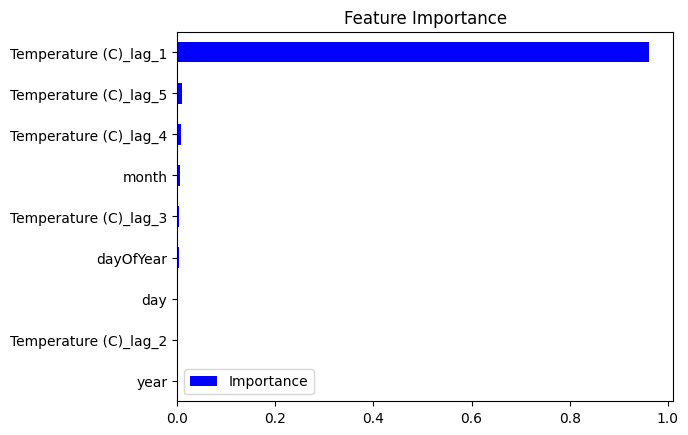

In [89]:
feature_importance.sort_values("Importance").plot(kind="barh", 
                                                  title="Feature Importance",
                                                  color="b")

In [90]:
test_df["xgb_forecasting"] = xgb_regressor.predict(X_test)

C:\Users\rahul_jana\AppData\Local\Temp\ipykernel_16264\1349233266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["xgb_forecasting"] = xgb_regressor.predict(X_test)


In [91]:
test_df

Formatted Date        Summary  Temperature (C)  \
Formatted Date                                                             
2014-11-26 06:00:00  2014-11-26 06:00:00          Foggy         0.072222   
2014-11-26 07:00:00  2014-11-26 07:00:00          Foggy         0.355556   
2014-11-26 08:00:00  2014-11-26 08:00:00          Foggy         1.138889   
2014-11-26 09:00:00  2014-11-26 09:00:00          Foggy         2.222222   
2014-11-26 10:00:00  2014-11-26 10:00:00       Overcast         2.916667   
...                                  ...            ...              ...   
2016-09-09 19:00:00  2016-09-09 19:00:00  Partly Cloudy        26.016667   
2016-09-09 20:00:00  2016-09-09 20:00:00  Partly Cloudy        24.583333   
2016-09-09 21:00:00  2016-09-09 21:00:00  Partly Cloudy        22.038889   
2016-09-09 22:00:00  2016-09-09 22:00:00  Partly Cloudy        21.522222   
2016-09-09 23:00:00  2016-09-09 23:00:00  Partly Cloudy        20.438889   

                     Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
Formatted Date                                                               
2014-11-26 06:00:00                  0.072222      0.93             1.6100   
2014-11-26 07:00:00                  0.355556      0.99             3.1073   
2014-11-26 08:00:00                  1.138889      1.00             1.5295   
2014-11-26 09:00:00                  2.222222      1.00             4.6046   
2014-11-26 10:00:00                  1.777778      0.94             4.8944   
...                                       ...       ...                ...   
2016-09-09 19:00:00                 26.016667      0.43            10.9963   
2016-09-09 20:00:00                 24.583333      0.48            10.0947   
2016-09-09 21:00:00                 22.038889      0.56             8.9838   
2016-09-09 22:00:00                 21.522222      0.60            10.5294   
2016-09-09 23:00:00                 20.438889      0.61             5.8765   

                     Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
Formatted Date                                                             
2014-11-26 06:00:00                     280           0.2737           0   
2014-11-26 07:00:00                      52           0.9177           0   
2014-11-26 08:00:00                      70           1.1592           0   
2014-11-26 09:00:00                     127           1.4651           0   
2014-11-26 10:00:00                     119           3.9445           0   
...                                     ...              ...         ...   
2016-09-09 19:00:00                      31          16.1000           0   
2016-09-09 20:00:00                      20          15.5526           0   
2016-09-09 21:00:00                      30          16.1000           0   
2016-09-09 22:00:00                      20          16.1000           0   
2016-09-09 23:00:00                      39          15.5204           0   

                     Pressure (millibars)  \
Formatted Date                              
2014-11-26 06:00:00               1026.40   
2014-11-26 07:00:00               1026.46   
2014-11-26 08:00:00               1026.50   
2014-11-26 09:00:00               1026.51   
2014-11-26 10:00:00               1026.61   
...                                   ...   
2016-09-09 19:00:00               1014.36   
2016-09-09 20:00:00               1015.16   
2016-09-09 21:00:00               1015.66   
2016-09-09 22:00:00               1015.95   
2016-09-09 23:00:00               1016.16   

                                                         Daily Summary  day  \
Formatted Date                                                                
2014-11-26 06:00:00  Foggy starting overnight continuing until morn...   26   
2014-11-26 07:00:00  Foggy starting overnight continuing until morn...   26   
2014-11-26 08:00:00  Foggy starting overnight continuing until morn...   26   
2014-11-26 09:00:00  Foggy starting overnight contin

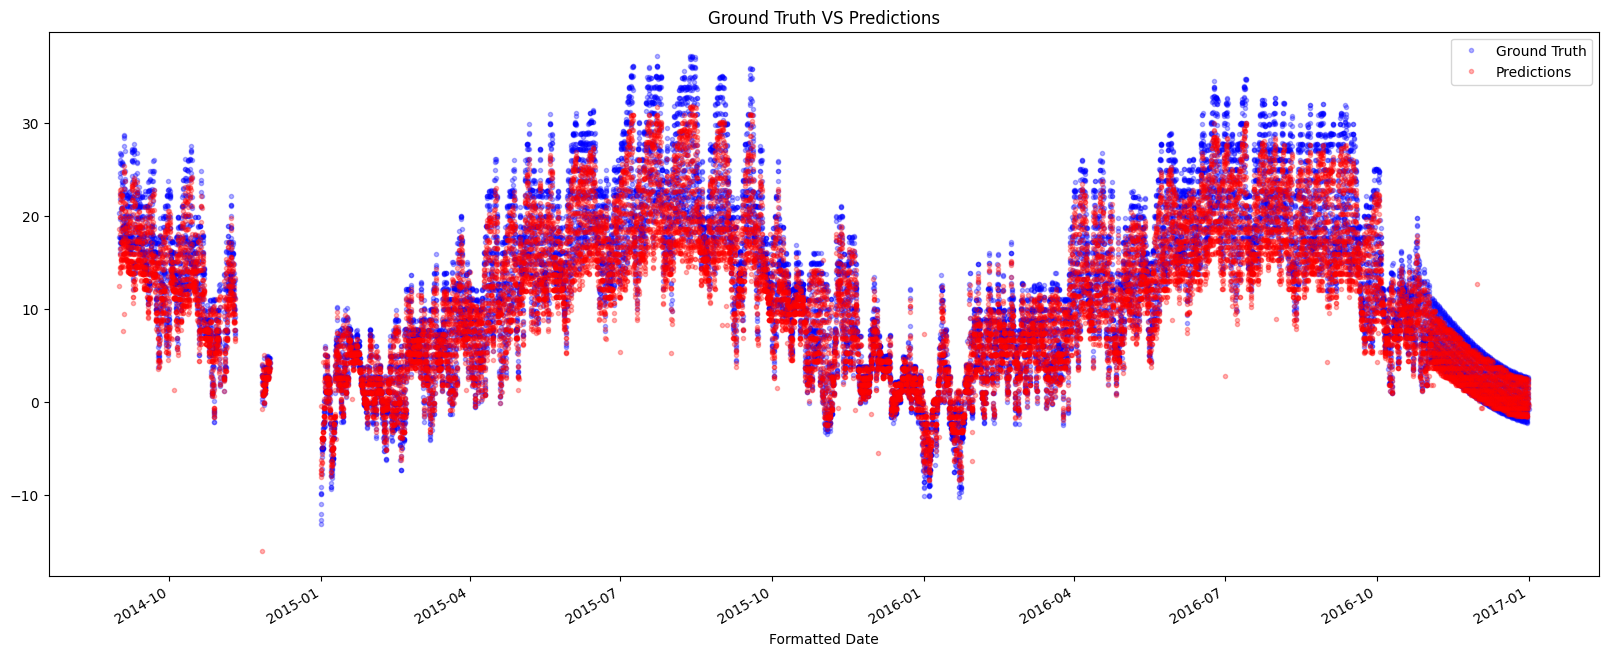

In [94]:
ax = test_df[["Temperature (C)"]].plot(figsize=(20, 8), style=".", color="b", alpha=0.3)
test_df["xgb_forecasting"].plot(ax=ax, style=".", color="r", alpha=0.3)
plt.legend(["Ground Truth", "Predictions"])
plt.title("Ground Truth VS Predictions")
plt.show()

In [95]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict the values for the test set
y_pred = xgb_regressor.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 1.8251791055079263
Mean Squared Error (MSE): 5.426487675686978
Root Mean Squared Error (RMSE): 2.329482276319564


The evaluation metrics indicate the performance of the model on the test set:

1. **Mean Absolute Error (MAE)**: 1.8251791055079263
    - This metric represents the average absolute difference between the predicted values and the actual values. On average, the model's predictions are off by about 1.83 degrees Celsius.

2. **Mean Squared Error (MSE)**: 5.426487675686978
    - This metric represents the average of the squared differences between the predicted values and the actual values. It gives more weight to larger errors. The MSE value of approximately 5.43 indicates the average squared error.

3. **Root Mean Squared Error (RMSE)**: 2.329482276319564
    - This metric is the square root of the MSE and provides an error metric in the same units as the target variable. An RMSE of approximately 2.33 degrees Celsius indicates that, on average, the model's predictions deviate from the actual values by about 2.33 degrees Celsius.

Overall, these metrics suggest that the model has a moderate level of accuracy, with an average prediction error of around 1.83 to 2.33 degrees Celsius.

In [97]:
train_temperature_lagged

Temperature (C)  day  month  year  dayOfYear  \
Formatted Date                                                      
2006-04-01 05:00:00         9.222222    1      4  2006         91   
2006-04-01 06:00:00         7.733333    1      4  2006         91   
2006-04-01 07:00:00         8.772222    1      4  2006         91   
2006-04-01 08:00:00        10.822222    1      4  2006         91   
2006-04-01 09:00:00        13.772222    1      4  2006         91   
...                              ...  ...    ...   ...        ...   
2014-11-26 01:00:00         1.738889   26     11  2014        330   
2014-11-26 02:00:00         1.622222   26     11  2014        330   
2014-11-26 03:00:00         1.161111   26     11  2014        330   
2014-11-26 04:00:00        -0.111111   26     11  2014        330   
2014-11-26 05:00:00        -0.944444   26     11  2014        330   

                     Temperature (C)_lag_1  Temperature (C)_lag_2  \
Formatted Date                                                      
2006-04-01 05:00:00               8.755556               8.288889   
2006-04-01 06:00:00               9.222222               8.755556   
2006-04-01 07:00:00               7.733333               9.222222   
2006-04-01 08:00:00               8.772222               7.733333   
2006-04-01 09:00:00              10.822222               8.772222   
...                                    ...                    ...   
2014-11-26 01:00:00               1.133333               2.705556   
2014-11-26 02:00:00               1.738889               1.133333   
2014-11-26 03:00:00               1.622222               1.738889   
2014-11-26 04:00:00               1.161111               1.622222   
2014-11-26 05:00:00              -0.111111               1.161111   

                     Temperature (C)_lag_3  Temperature (C)_lag_4  \
Formatted Date                                                      
2006-04-01 05:00:00               9.377778               9.355556   
2006-04-01 06:00:00               8.288889               9.377778   
2006-04-01 07:00:00               8.755556               8.288889   
2006-04-01 08:00:00               9.222222               8.755556   
2006-04-01 09:00:00               7.733333               9.222222   
...                                    ...                    ...   
2014-11-26 01:00:00               2.838889               3.238889   
2014-11-26 02:00:00               2.705556               2.838889   
2014-11-26 03:00:00               1.133333               2.705556   
2014-11-26 04:00:00               1.738889               1.133333   
2014-11-26 05:00:00               1.622222               1.738889   

                     Temperature (C)_lag_5  
Formatted Date                              
2006-04-01 05:00:00               9.472222  
2006-04-01 06:00:00               9.355556  
2006-04-01 07:00:00               9.377778  
2006-04-01 08:00:00               8.288889  
2006-04-01 09:00:00               8.755556  
...                                    ...  
2014-11-26 01:00:00               2.711111  
2014-11-26 02:00:00               3.238889  
2014-11-26 03:00:00               2.838889  
2014-11-26 04:00:00               2.705556  
2014-11-26 05:00:00               1.133333  

[77157 rows x 10 columns]

In [60]:
df

Formatted Date        Summary Precip Type  \
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain   
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain   
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain   
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain   
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain   
...                              ...            ...         ...   
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0             9.472222                  7.388889      0.89            14.1197   
1             9.355556                  7.227778      0.86            14.2646   
2             9.377778                  9.377778      0.89             3.9284   
3             8.288889                  5.944444      0.83            14.1036   
4             8.755556                  6.977778      0.83            11.0446   
...                ...                       ...       ...                ...   
96448        26.016667                 26.016667      0.43            10.9963   
96449        24.583333                 24.583333      0.48            10.0947   
96450        22.038889                 22.038889      0.56             8.9838   
96451        21.522222                 21.522222      0.60            10.5294   
96452        20.438889                 20.438889      0.61             5.8765   

       Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
0                         251          15.8263           0   
1                         259          15.8263           0   
2                         204          14.9569           0   
3                         269          15.8263           0   
4                         259          15.8263           0   
...                       ...              ...         ...   
96448                      31          16.1000           0   
96449                      20          15.5526           0   
96450                      30          16.1000           0   
96451                      20          16.1000           0   
96452                      39          15.5204           0   

       Pressure (millibars)                           Daily Summary  
0                   1015.13       Partly cloudy throughout the day.  
1                   1015.63       Partly cloudy throughout the day.  
2                   1015.94       Partly cloudy throughout the day.  
3                   1016.41       Partly cloudy throughout the day.  
4                   1016.51       Partly cloudy throughout the day.  
...                     ...                                     ...  
96448               1014.36  Partly cloudy starting in the morning.  
96449               1015.16  Partly cloudy starting in the morning.  
96450               1015.66  Partly cloudy starting in the morning.  
96451               1015.95  Partly cloudy starting in the morning.  
96452               1016.16  Partly cloudy starting in the morning.  

[96453 rows x 12 columns]

In [61]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77162 entries, 2006-04-01 00:00:00 to 2014-11-26 05:00:00
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            77162 non-null  object 
 1   Summary                   77162 non-null  object 
 2   Temperature (C)           77162 non-null  float64
 3   Apparent Temperature (C)  77162 non-null  float64
 4   Humidity                  77162 non-null  float64
 5   Wind Speed (km/h)         77162 non-null  float64
 6   Wind Bearing (degrees)    77162 non-null  int64  
 7   Visibility (km)           77162 non-null  float64
 8   Loud Cover                77162 non-null  int64  
 9   Pressure (millibars)      77162 non-null  float64
 10  Daily Summary             77162 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 9.1+ MB


In [62]:
X_train_master = train_df.drop(['Formatted Date',
                         "Summary",
                         "Daily Summary"], axis=1)

In [63]:
X_test_master = test_df.drop(['Formatted Date',
                         "Summary",
                         "Daily Summary"], axis=1)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the RandomForestRegressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_regressor.predict(X_test_scaled)
print("Mean Absolute Error:", np.mean(np.abs(y_test - y_pred)))
print("Mean Squared Error:", np.mean((y_test - y_pred)**2))
print("Root Mean Squared Error:", np.sqrt(np.mean((y_test - y_pred)**2)))

## Summary

In [98]:
df_not_null

Formatted Date        Summary  Temperature (C)  \
Formatted Date                                                             
2006-04-01 00:00:00  2006-04-01 00:00:00  Partly Cloudy         9.472222   
2006-04-01 01:00:00  2006-04-01 01:00:00  Partly Cloudy         9.355556   
2006-04-01 02:00:00  2006-04-01 02:00:00  Mostly Cloudy         9.377778   
2006-04-01 03:00:00  2006-04-01 03:00:00  Partly Cloudy         8.288889   
2006-04-01 04:00:00  2006-04-01 04:00:00  Mostly Cloudy         8.755556   
...                                  ...            ...              ...   
2016-09-09 19:00:00  2016-09-09 19:00:00  Partly Cloudy        26.016667   
2016-09-09 20:00:00  2016-09-09 20:00:00  Partly Cloudy        24.583333   
2016-09-09 21:00:00  2016-09-09 21:00:00  Partly Cloudy        22.038889   
2016-09-09 22:00:00  2016-09-09 22:00:00  Partly Cloudy        21.522222   
2016-09-09 23:00:00  2016-09-09 23:00:00  Partly Cloudy        20.438889   

                     Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
Formatted Date                                                               
2006-04-01 00:00:00                  7.388889      0.89            14.1197   
2006-04-01 01:00:00                  7.227778      0.86            14.2646   
2006-04-01 02:00:00                  9.377778      0.89             3.9284   
2006-04-01 03:00:00                  5.944444      0.83            14.1036   
2006-04-01 04:00:00                  6.977778      0.83            11.0446   
...                                       ...       ...                ...   
2016-09-09 19:00:00                 26.016667      0.43            10.9963   
2016-09-09 20:00:00                 24.583333      0.48            10.0947   
2016-09-09 21:00:00                 22.038889      0.56             8.9838   
2016-09-09 22:00:00                 21.522222      0.60            10.5294   
2016-09-09 23:00:00                 20.438889      0.61             5.8765   

                     Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
Formatted Date                                                             
2006-04-01 00:00:00                     251          15.8263           0   
2006-04-01 01:00:00                     259          15.8263           0   
2006-04-01 02:00:00                     204          14.9569           0   
2006-04-01 03:00:00                     269          15.8263           0   
2006-04-01 04:00:00                     259          15.8263           0   
...                                     ...              ...         ...   
2016-09-09 19:00:00                      31          16.1000           0   
2016-09-09 20:00:00                      20          15.5526           0   
2016-09-09 21:00:00                      30          16.1000           0   
2016-09-09 22:00:00                      20          16.1000           0   
2016-09-09 23:00:00                      39          15.5204           0   

                     Pressure (millibars)  \
Formatted Date                              
2006-04-01 00:00:00               1015.13   
2006-04-01 01:00:00               1015.63   
2006-04-01 02:00:00               1015.94   
2006-04-01 03:00:00               1016.41   
2006-04-01 04:00:00               1016.51   
...                                   ...   
2016-09-09 19:00:00               1014.36   
2016-09-09 20:00:00               1015.16   
2016-09-09 21:00:00               1015.66   
2016-09-09 22:00:00               1015.95   
2016-09-09 23:00:00               1016.16   

                                              Daily Summary  
Formatted Date                                               
2006-04-01 00:00:00       Partly cloudy throughout the day.  
2006-04-01 01:00:00       Partly cloudy throughout the day.  
2006-04-01 02:00:00       Partly cloudy throughout the day.  
2006-04-01 03:00:00       Partly cloudy throughout the day.  
2006-04-01 04:00:00       Partly cloudy throughout the day.  
...          

In [99]:
df_not_null.columns

Index(['Formatted Date', 'Summary', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [100]:
df_not_null.drop(['Daily Summary'], axis=1, inplace=True)

In [101]:
df_not_null

Formatted Date        Summary  Temperature (C)  \
Formatted Date                                                             
2006-04-01 00:00:00  2006-04-01 00:00:00  Partly Cloudy         9.472222   
2006-04-01 01:00:00  2006-04-01 01:00:00  Partly Cloudy         9.355556   
2006-04-01 02:00:00  2006-04-01 02:00:00  Mostly Cloudy         9.377778   
2006-04-01 03:00:00  2006-04-01 03:00:00  Partly Cloudy         8.288889   
2006-04-01 04:00:00  2006-04-01 04:00:00  Mostly Cloudy         8.755556   
...                                  ...            ...              ...   
2016-09-09 19:00:00  2016-09-09 19:00:00  Partly Cloudy        26.016667   
2016-09-09 20:00:00  2016-09-09 20:00:00  Partly Cloudy        24.583333   
2016-09-09 21:00:00  2016-09-09 21:00:00  Partly Cloudy        22.038889   
2016-09-09 22:00:00  2016-09-09 22:00:00  Partly Cloudy        21.522222   
2016-09-09 23:00:00  2016-09-09 23:00:00  Partly Cloudy        20.438889   

                     Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
Formatted Date                                                               
2006-04-01 00:00:00                  7.388889      0.89            14.1197   
2006-04-01 01:00:00                  7.227778      0.86            14.2646   
2006-04-01 02:00:00                  9.377778      0.89             3.9284   
2006-04-01 03:00:00                  5.944444      0.83            14.1036   
2006-04-01 04:00:00                  6.977778      0.83            11.0446   
...                                       ...       ...                ...   
2016-09-09 19:00:00                 26.016667      0.43            10.9963   
2016-09-09 20:00:00                 24.583333      0.48            10.0947   
2016-09-09 21:00:00                 22.038889      0.56             8.9838   
2016-09-09 22:00:00                 21.522222      0.60            10.5294   
2016-09-09 23:00:00                 20.438889      0.61             5.8765   

                     Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
Formatted Date                                                             
2006-04-01 00:00:00                     251          15.8263           0   
2006-04-01 01:00:00                     259          15.8263           0   
2006-04-01 02:00:00                     204          14.9569           0   
2006-04-01 03:00:00                     269          15.8263           0   
2006-04-01 04:00:00                     259          15.8263           0   
...                                     ...              ...         ...   
2016-09-09 19:00:00                      31          16.1000           0   
2016-09-09 20:00:00                      20          15.5526           0   
2016-09-09 21:00:00                      30          16.1000           0   
2016-09-09 22:00:00                      20          16.1000           0   
2016-09-09 23:00:00                      39          15.5204           0   

                     Pressure (millibars)  
Formatted Date                             
2006-04-01 00:00:00               1015.13  
2006-04-01 01:00:00               1015.63  
2006-04-01 02:00:00               1015.94  
2006-04-01 03:00:00               1016.41  
2006-04-01 04:00:00               1016.51  
...                                   ...  
2016-09-09 19:00:00               1014.36  
2016-09-09 20:00:00               1015.16  
2016-09-09 21:00:00               1015.66  
2016-09-09 22:00:00               1015.95  
2016-09-09 23:00:00               1016.16  

[96453 rows x 10 columns]

In [102]:
df_not_null["Summary"].value_counts()

Summary
Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Hu

In [103]:
# Filter the dataframe for the specified values in the Summary column
filtered_df = df_not_null[df_not_null['Summary'].isin(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Clear'])]

# Display the filtered dataframe
filtered_df

Formatted Date        Summary  Temperature (C)  \
Formatted Date                                                             
2006-04-01 00:00:00  2006-04-01 00:00:00  Partly Cloudy         9.472222   
2006-04-01 01:00:00  2006-04-01 01:00:00  Partly Cloudy         9.355556   
2006-04-01 02:00:00  2006-04-01 02:00:00  Mostly Cloudy         9.377778   
2006-04-01 03:00:00  2006-04-01 03:00:00  Partly Cloudy         8.288889   
2006-04-01 04:00:00  2006-04-01 04:00:00  Mostly Cloudy         8.755556   
...                                  ...            ...              ...   
2016-09-09 19:00:00  2016-09-09 19:00:00  Partly Cloudy        26.016667   
2016-09-09 20:00:00  2016-09-09 20:00:00  Partly Cloudy        24.583333   
2016-09-09 21:00:00  2016-09-09 21:00:00  Partly Cloudy        22.038889   
2016-09-09 22:00:00  2016-09-09 22:00:00  Partly Cloudy        21.522222   
2016-09-09 23:00:00  2016-09-09 23:00:00  Partly Cloudy        20.438889   

                     Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
Formatted Date                                                               
2006-04-01 00:00:00                  7.388889      0.89            14.1197   
2006-04-01 01:00:00                  7.227778      0.86            14.2646   
2006-04-01 02:00:00                  9.377778      0.89             3.9284   
2006-04-01 03:00:00                  5.944444      0.83            14.1036   
2006-04-01 04:00:00                  6.977778      0.83            11.0446   
...                                       ...       ...                ...   
2016-09-09 19:00:00                 26.016667      0.43            10.9963   
2016-09-09 20:00:00                 24.583333      0.48            10.0947   
2016-09-09 21:00:00                 22.038889      0.56             8.9838   
2016-09-09 22:00:00                 21.522222      0.60            10.5294   
2016-09-09 23:00:00                 20.438889      0.61             5.8765   

                     Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
Formatted Date                                                             
2006-04-01 00:00:00                     251          15.8263           0   
2006-04-01 01:00:00                     259          15.8263           0   
2006-04-01 02:00:00                     204          14.9569           0   
2006-04-01 03:00:00                     269          15.8263           0   
2006-04-01 04:00:00                     259          15.8263           0   
...                                     ...              ...         ...   
2016-09-09 19:00:00                      31          16.1000           0   
2016-09-09 20:00:00                      20          15.5526           0   
2016-09-09 21:00:00                      30          16.1000           0   
2016-09-09 22:00:00                      20          16.1000           0   
2016-09-09 23:00:00                      39          15.5204           0   

                     Pressure (millibars)  
Formatted Date                             
2006-04-01 00:00:00               1015.13  
2006-04-01 01:00:00               1015.63  
2006-04-01 02:00:00               1015.94  
2006-04-01 03:00:00               1016.41  
2006-04-01 04:00:00               1016.51  
...                                   ...  
2016-09-09 19:00:00               1014.36  
2016-09-09 20:00:00               1015.16  
2016-09-09 21:00:00               1015.66  
2016-09-09 22:00:00               1015.95  
2016-09-09 23:00:00               1016.16  

[87314 rows x 10 columns]

In [106]:
filtered_df

Formatted Date        Summary  Temperature (C)  \
Formatted Date                                                             
2006-04-01 00:00:00  2006-04-01 00:00:00  Partly Cloudy         9.472222   
2006-04-01 01:00:00  2006-04-01 01:00:00  Partly Cloudy         9.355556   
2006-04-01 02:00:00  2006-04-01 02:00:00  Mostly Cloudy         9.377778   
2006-04-01 03:00:00  2006-04-01 03:00:00  Partly Cloudy         8.288889   
2006-04-01 04:00:00  2006-04-01 04:00:00  Mostly Cloudy         8.755556   
...                                  ...            ...              ...   
2016-09-09 19:00:00  2016-09-09 19:00:00  Partly Cloudy        26.016667   
2016-09-09 20:00:00  2016-09-09 20:00:00  Partly Cloudy        24.583333   
2016-09-09 21:00:00  2016-09-09 21:00:00  Partly Cloudy        22.038889   
2016-09-09 22:00:00  2016-09-09 22:00:00  Partly Cloudy        21.522222   
2016-09-09 23:00:00  2016-09-09 23:00:00  Partly Cloudy        20.438889   

                     Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
Formatted Date                                                               
2006-04-01 00:00:00                  7.388889      0.89            14.1197   
2006-04-01 01:00:00                  7.227778      0.86            14.2646   
2006-04-01 02:00:00                  9.377778      0.89             3.9284   
2006-04-01 03:00:00                  5.944444      0.83            14.1036   
2006-04-01 04:00:00                  6.977778      0.83            11.0446   
...                                       ...       ...                ...   
2016-09-09 19:00:00                 26.016667      0.43            10.9963   
2016-09-09 20:00:00                 24.583333      0.48            10.0947   
2016-09-09 21:00:00                 22.038889      0.56             8.9838   
2016-09-09 22:00:00                 21.522222      0.60            10.5294   
2016-09-09 23:00:00                 20.438889      0.61             5.8765   

                     Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
Formatted Date                                                             
2006-04-01 00:00:00                     251          15.8263           0   
2006-04-01 01:00:00                     259          15.8263           0   
2006-04-01 02:00:00                     204          14.9569           0   
2006-04-01 03:00:00                     269          15.8263           0   
2006-04-01 04:00:00                     259          15.8263           0   
...                                     ...              ...         ...   
2016-09-09 19:00:00                      31          16.1000           0   
2016-09-09 20:00:00                      20          15.5526           0   
2016-09-09 21:00:00                      30          16.1000           0   
2016-09-09 22:00:00                      20          16.1000           0   
2016-09-09 23:00:00                      39          15.5204           0   

                     Pressure (millibars)  
Formatted Date                             
2006-04-01 00:00:00               1015.13  
2006-04-01 01:00:00               1015.63  
2006-04-01 02:00:00               1015.94  
2006-04-01 03:00:00               1016.41  
2006-04-01 04:00:00               1016.51  
...                                   ...  
2016-09-09 19:00:00               1014.36  
2016-09-09 20:00:00               1015.16  
2016-09-09 21:00:00               1015.66  
2016-09-09 22:00:00               1015.95  
2016-09-09 23:00:00               1016.16  

[87314 rows x 10 columns]

In [104]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Encode the target variable
label_encoder = LabelEncoder()
y_train_summary = label_encoder.fit_transform(filtered_df['Summary'])
y_test_summary = label_encoder.transform(filtered_df['Summary'])

In [107]:
# Define the features for training
X_train_features = filtered_df.drop(['Formatted Date', 'Summary'], axis=1)
X_test_features = filtered_df.drop(['Formatted Date', 'Summary'], axis=1)

In [110]:
X_train_features

Temperature (C)  Apparent Temperature (C)  Humidity  \
Formatted Date                                                             
2006-04-01 00:00:00         9.472222                  7.388889      0.89   
2006-04-01 01:00:00         9.355556                  7.227778      0.86   
2006-04-01 02:00:00         9.377778                  9.377778      0.89   
2006-04-01 03:00:00         8.288889                  5.944444      0.83   
2006-04-01 04:00:00         8.755556                  6.977778      0.83   
...                              ...                       ...       ...   
2016-09-09 19:00:00        26.016667                 26.016667      0.43   
2016-09-09 20:00:00        24.583333                 24.583333      0.48   
2016-09-09 21:00:00        22.038889                 22.038889      0.56   
2016-09-09 22:00:00        21.522222                 21.522222      0.60   
2016-09-09 23:00:00        20.438889                 20.438889      0.61   

                     Wind Speed (km/h)  Wind Bearing (degrees)  \
Formatted Date                                                   
2006-04-01 00:00:00            14.1197                     251   
2006-04-01 01:00:00            14.2646                     259   
2006-04-01 02:00:00             3.9284                     204   
2006-04-01 03:00:00            14.1036                     269   
2006-04-01 04:00:00            11.0446                     259   
...                                ...                     ...   
2016-09-09 19:00:00            10.9963                      31   
2016-09-09 20:00:00            10.0947                      20   
2016-09-09 21:00:00             8.9838                      30   
2016-09-09 22:00:00            10.5294                      20   
2016-09-09 23:00:00             5.8765                      39   

                     Visibility (km)  Loud Cover  Pressure (millibars)  
Formatted Date                                                          
2006-04-01 00:00:00          15.8263           0               1015.13  
2006-04-01 01:00:00          15.8263           0               1015.63  
2006-04-01 02:00:00          14.9569           0               1015.94  
2006-04-01 03:00:00          15.8263           0               1016.41  
2006-04-01 04:00:00          15.8263           0               1016.51  
...                              ...         ...                   ...  
2016-09-09 19:00:00          16.1000           0               1014.36  
2016-09-09 20:00:00          15.5526           0               1015.16  
2016-09-09 21:00:00          16.1000           0               1015.66  
2016-09-09 22:00:00          16.1000           0               1015.95  
2016-09-09 23:00:00          15.5204           0               1016.16  

[87314 rows x 8 columns]

In [108]:
# Train the XGBClassifier
xgb_classifier = XGBClassifier(n_estimators=200, learning_rate=0.01, early_stopping_rounds=20)
xgb_classifier.fit(X_train_features, y_train_summary, eval_set=[(X_train_features, y_train_summary), (X_test_features, y_test_summary)], verbose=50)

[0]	validation_0-mlogloss:1.38291	validation_1-mlogloss:1.38291
[50]	validation_0-mlogloss:1.25925	validation_1-mlogloss:1.25925
[100]	validation_0-mlogloss:1.18840	validation_1-mlogloss:1.18840
[150]	validation_0-mlogloss:1.14402	validation_1-mlogloss:1.14402
[199]	validation_0-mlogloss:1.11478	validation_1-mlogloss:1.11478


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=20,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [109]:
# Predict the values for the test set
y_pred_summary = xgb_classifier.predict(X_test_features)

# Decode the predicted labels
y_pred_summary_decoded = label_encoder.inverse_transform(y_pred_summary)

# Evaluate the model
accuracy = accuracy_score(y_test_summary, y_pred_summary)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test_summary, y_pred_summary, target_names=label_encoder.classes_))

Accuracy: 0.5175802276839911
Classification Report:
               precision    recall  f1-score   support

        Clear       0.63      0.16      0.25     10890
Mostly Cloudy       0.47      0.48      0.47     28094
     Overcast       0.56      0.51      0.53     16597
Partly Cloudy       0.53      0.69      0.60     31733

     accuracy                           0.52     87314
    macro avg       0.55      0.46      0.46     87314
 weighted avg       0.53      0.52      0.50     87314



### Create LAG features

In [112]:
X_train_features.drop(["Loud Cover"], axis=1, inplace=True)

In [113]:
X_test_features.drop(["Loud Cover"], axis=1, inplace=True)

In [114]:
X_test_features.columns

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)'],
      dtype='object')

In [120]:
# Generate 5 days of lag features for the specified columns in the X_train DataFrame
columns_to_lag = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
                  'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
                  'Pressure (millibars)']

X_train_lagged = X_train_master.copy()
X_test_lagged = X_test_master.copy()

for column in columns_to_lag:
    X_train_lagged = create_lag_features(X_train_lagged, column, 5)
    X_test_lagged = create_lag_features(X_test_lagged, column, 5)


In [124]:
print(X_train_lagged.head(1).index)
print(X_train_lagged.tail(1).index)

Index(['2006-04-01 00:00:00'], dtype='object', name='Formatted Date')
Index(['2014-11-26 05:00:00'], dtype='object', name='Formatted Date')


In [126]:
print(y_train.head(1).index)
print(y_train.tail(1).index)

DatetimeIndex(['2006-04-01 05:00:00'], dtype='datetime64[ns]', name='Formatted Date', freq=None)
DatetimeIndex(['2014-11-26 05:00:00'], dtype='datetime64[ns]', name='Formatted Date', freq=None)


In [127]:
X_train_lagged = pd.concat([X_train_lagged, y_train], axis=1)

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [128]:
# Check for duplicate index values
duplicate_indices = df_not_null.index.duplicated()

# Print the duplicate indices
print("Duplicate indices:", df_not_null.index[duplicate_indices])

# Remove duplicate index values
df_not_null = df_not_null[~df_not_null.index.duplicated(keep='first')]

# Verify that the index is now unique
print("Index is unique:", df_not_null.index.is_unique)

# Now you can safely concatenate the DataFrames
X_train_lagged = pd.concat([X_train_lagged, y_train], axis=1)

Duplicate indices: Index(['2006-10-29 02:00:00', '2007-10-28 02:00:00', '2008-10-26 02:00:00',
       '2009-10-25 02:00:00', '2010-08-02 00:00:00', '2010-08-02 01:00:00',
       '2010-08-02 02:00:00', '2010-08-02 03:00:00', '2010-08-02 04:00:00',
       '2010-08-02 05:00:00', '2010-08-02 06:00:00', '2010-08-02 07:00:00',
       '2010-08-02 08:00:00', '2010-08-02 09:00:00', '2010-08-02 10:00:00',
       '2010-08-02 11:00:00', '2010-08-02 12:00:00', '2010-08-02 13:00:00',
       '2010-08-02 14:00:00', '2010-08-02 15:00:00', '2010-08-02 16:00:00',
       '2010-08-02 17:00:00', '2010-08-02 18:00:00', '2010-08-02 19:00:00',
       '2010-08-02 20:00:00', '2010-08-02 21:00:00', '2010-08-02 22:00:00',
       '2010-08-02 23:00:00', '2010-10-31 02:00:00', '2011-10-30 02:00:00',
       '2012-10-28 02:00:00', '2013-10-27 02:00:00', '2014-10-26 02:00:00',
       '2015-10-25 02:00:00', '2016-10-30 02:00:00'],
      dtype='object', name='Formatted Date')
Index is unique: True


InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [125]:
print(X_test_lagged.head(1).index)
print(X_test_lagged.tail(1).index)

Index(['2014-11-26 06:00:00'], dtype='object', name='Formatted Date')
Index(['2016-09-09 23:00:00'], dtype='object', name='Formatted Date')


In [121]:
X_train_lagged = pd.concat([X_train_lagged, y_train], axis=1)

X_test_lagged = pd.concat([X_test_lagged, y_test], axis=1)

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [ ]:
X_train_lagged.dropna(inplace=True)  # Drop rows with NaN values resulting from lagging
X_test_lagged.dropna(inplace=True)  # Drop rows with NaN values resulting from lagging

In [116]:
X_train_lagged

Temperature (C)  Apparent Temperature (C)  Humidity  \
Formatted Date                                                             
2006-04-01 05:00:00         9.222222                  7.111111      0.85   
2006-04-01 06:00:00         7.733333                  5.522222      0.95   
2006-04-01 07:00:00         8.772222                  6.527778      0.89   
2006-04-01 08:00:00        10.822222                 10.822222      0.82   
2006-04-01 09:00:00        13.772222                 13.772222      0.72   
...                              ...                       ...       ...   
2014-11-26 01:00:00         1.738889                  0.061111      0.93   
2014-11-26 02:00:00         1.622222                 -0.305556      0.93   
2014-11-26 03:00:00         1.161111                  1.161111      0.92   
2014-11-26 04:00:00        -0.111111                 -0.111111      0.93   
2014-11-26 05:00:00        -0.944444                 -0.944444      0.93   

                     Wind Speed (km/h)  Wind Bearing (degrees)  \
Formatted Date                                                   
2006-04-01 05:00:00            13.9587                     258   
2006-04-01 06:00:00            12.3648                     259   
2006-04-01 07:00:00            14.1519                     260   
2006-04-01 08:00:00            11.3183                     259   
2006-04-01 09:00:00            12.5258                     279   
...                                ...                     ...   
2014-11-26 01:00:00             5.8121                       1   
2014-11-26 02:00:00             6.4400                      30   
2014-11-26 03:00:00             3.2039                     339   
2014-11-26 04:00:00             3.0590                       7   
2014-11-26 05:00:00             3.2200                       0   

                     Visibility (km)  Loud Cover  Pressure (millibars)  \
Formatted Date                                                           
2006-04-01 05:00:00          14.9569           0               1016.66   
2006-04-01 06:00:00           9.9820           0               1016.72   
2006-04-01 07:00:00           9.9820           0               1016.84   
2006-04-01 08:00:00           9.9820           0               1017.37   
2006-04-01 09:00:00           9.9820           0               1017.22   
...                              ...         ...                   ...   
2014-11-26 01:00:00           4.8139           0               1027.23   
2014-11-26 02:00:00           2.9946           0               1026.94   
2014-11-26 03:00:00           1.9320           0               1026.63   
2014-11-26 04:00:00           2.7853           0               1026.62   
2014-11-26 05:00:00           0.2737           0               1026.51   

                     Temperature (C)_lag_1  Temperature (C)_lag_2  ...  \
Formatted Date                                                     ...   
2006-04-01 05:00:00               8.755556               8.288889  ...   
2006-04-01 06:00:00               9.222222               8.755556  ...   
2006-04-01 07:00:00               7.733333               9.222222  ...   
2006-04-01 08:00:00               8.772222               7.733333  ...   
2006-04-01 09:00:00              10.822222               8.772222  ...   
...                                    ...                    ...  ...   
2014-11-26 01:00:00               1.133333               2.705556  ...   
2014-11-26 02:00:00               1.738889               1.133333  ...   
2014-11-26 03:00:00               1.622222               1.738889  ...   
2014-11-26 04:00:00               1.161111               1.622222  ...   
2014-11-26 05:00:00              -0.111111               1.161111  ...   

                     Visibility (km)_lag_1  Visibility (km)_lag_2  \
Formatted Date                                                      
2006-04-01 05:00:00                15.8263                15.8263   
2006-04-01 06:00:00                14.95

In [117]:
X_test_lagged

Temperature (C)  Apparent Temperature (C)  Humidity  \
Formatted Date                                                             
2014-11-26 11:00:00         2.894444                  0.738889      0.89   
2014-11-26 12:00:00         2.933333                  2.933333      0.95   
2014-11-26 13:00:00         4.022222                  4.022222      0.76   
2014-11-26 14:00:00         3.883333                  3.883333      0.82   
2014-11-26 15:00:00         3.838889                  1.883333      0.83   
...                              ...                       ...       ...   
2016-09-09 19:00:00        26.016667                 26.016667      0.43   
2016-09-09 20:00:00        24.583333                 24.583333      0.48   
2016-09-09 21:00:00        22.038889                 22.038889      0.56   
2016-09-09 22:00:00        21.522222                 21.522222      0.60   
2016-09-09 23:00:00        20.438889                 20.438889      0.61   

                     Wind Speed (km/h)  Wind Bearing (degrees)  \
Formatted Date                                                   
2014-11-26 11:00:00             7.7763                     140   
2014-11-26 12:00:00             1.9320                     135   
2014-11-26 13:00:00             3.7996                     130   
2014-11-26 14:00:00             2.7048                     354   
2014-11-26 15:00:00             7.6636                      35   
...                                ...                     ...   
2016-09-09 19:00:00            10.9963                      31   
2016-09-09 20:00:00            10.0947                      20   
2016-09-09 21:00:00             8.9838                      30   
2016-09-09 22:00:00            10.5294                      20   
2016-09-09 23:00:00             5.8765                      39   

                     Visibility (km)  Loud Cover  Pressure (millibars)  \
Formatted Date                                                           
2014-11-26 11:00:00           3.9767           0               1026.30   
2014-11-26 12:00:00           4.4436           0               1025.90   
2014-11-26 13:00:00           7.6475           0               1025.42   
2014-11-26 14:00:00           7.7441           0               1024.99   
2014-11-26 15:00:00           5.8765           0               1024.79   
...                              ...         ...                   ...   
2016-09-09 19:00:00          16.1000           0               1014.36   
2016-09-09 20:00:00          15.5526           0               1015.16   
2016-09-09 21:00:00          16.1000           0               1015.66   
2016-09-09 22:00:00          16.1000           0               1015.95   
2016-09-09 23:00:00          15.5204           0               1016.16   

                     Temperature (C)_lag_1  Temperature (C)_lag_2  ...  \
Formatted Date                                                     ...   
2014-11-26 11:00:00               2.916667               2.222222  ...   
2014-11-26 12:00:00               2.894444               2.916667  ...   
2014-11-26 13:00:00               2.933333               2.894444  ...   
2014-11-26 14:00:00               4.022222               2.933333  ...   
2014-11-26 15:00:00               3.883333               4.022222  ...   
...                                    ...                    ...  ...   
2016-09-09 19:00:00              28.838889              30.766667  ...   
2016-09-09 20:00:00              26.016667              28.838889  ...   
2016-09-09 21:00:00              24.583333              26.016667  ...   
2016-09-09 22:00:00              22.038889              24.583333  ...   
2016-09-09 23:00:00              21.522222              22.038889  ...   

                     Visibility (km)_lag_1  Visibility (km)_lag_2  \
Formatted Date                                                      
2014-11-26 11:00:00                 3.9445                 1.4651   
2014-11-26 12:00:00                 3.97

In [118]:
xgb_lagged_clf = XGBClassifier(n_estimators=200, learning_rate=0.01, early_stopping_rounds=20)

In [119]:
xgb_lagged_clf.fit(X_train_lagged, y_train_summary, eval_set=[(X_train_lagged, y_train_summary), (X_test_lagged, y_test_summary)], verbose=50)

XGBoostError: [17:00:03] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\data\data.cc:455: Check failed: this->labels.Size() % this->num_row_ == 0 (10157 vs. 0) : Incorrect size for labels.